In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
df=pd.read_csv("creditcard.csv",low_memory=False)

In [15]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.shape

(284807, 31)

In [17]:
df.rename(columns={"Class":"Target"}, inplace=True)

In [18]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
value_counts = df['Target'].value_counts()
print(value_counts)

0    284315
1       492
Name: Target, dtype: int64


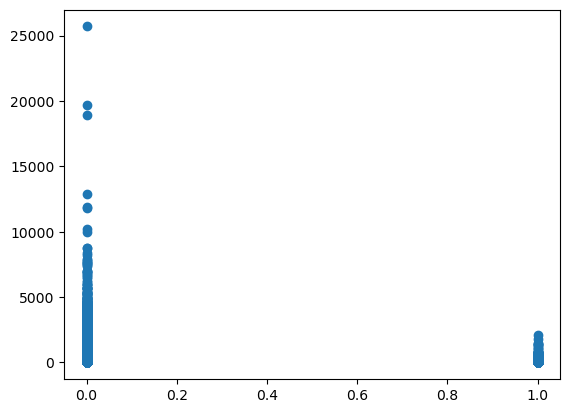

In [20]:
plt.scatter(df.Target,df.Amount)

In [21]:
df[df['Target'] == 1]['Amount'].max()
df[df['Target'] == 0]['Amount'].max()

25691.16

In [23]:
cor=df.corr()["Target"]
correlation = cor.sort_values(ascending=False)
print(correlation)

Target    1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Target, dtype: float64


In [24]:
columns_to_remove = correlation[correlation < 0].index

# Remove columns from DataFrame
df_filtered = df.drop(columns=columns_to_remove)

df_filtered

,V2,V4,V8,V11,V19,V20,V21,V22,V25,V26,V27,V28,Amount,Target
0,-0.072781,1.378155,0.098698,-0.551600,0.403993,0.251412,-0.018307,0.277838,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.266151,0.448154,0.085102,1.612727,-0.145783,-0.069083,-0.225775,-0.638672,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.340163,0.379780,0.247676,0.624501,-2.261857,0.524980,0.247998,0.771679,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.185226,-0.863291,0.377436,-0.226487,-1.232622,-0.208038,-0.108300,0.005274,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.877737,0.403034,-0.270533,-0.822843,0.803487,0.408542,-0.009431,0.798278,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,10.071785,-2.066656,7.305334,-1.593105,-0.682920,1.475829,0.213454,0.111864,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.055080,-0.738589,0.294869,-0.150189,-1.545556,0.059616,0.214205,0.924384,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,-0.301254,-0.557828,0.708417,0.411614,-0.577252,0.001396,0.232045,0.578229,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0.530483,0.689799,0.679145,-1.933849,2.897849,0.127434,0.265245,0.800049,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [35]:
from sklearn.preprocessing import MinMaxScaler

features = df_filtered.drop(columns=['Target'])

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

df_scaled['Target'] = df_filtered['Target']

print(df_scaled)

              V2        V4        V8       V11       V19       V20       V21  \
0       0.766490  0.313023  0.786444  0.252484  0.594863  0.582942  0.561184   
1       0.770067  0.271796  0.786298  0.381188  0.551930  0.579530  0.557840   
2       0.753118  0.268766  0.788042  0.322422  0.386683  0.585855  0.565477   
3       0.765304  0.213661  0.789434  0.271817  0.467058  0.578050  0.559734   
4       0.776520  0.269796  0.782484  0.236355  0.626060  0.584615  0.561327   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.873531  0.160317  0.863749  0.190550  0.509985  0.595979  0.564920   
284803  0.766677  0.219189  0.788548  0.276355  0.442620  0.580900  0.564933   
284804  0.764080  0.227202  0.792985  0.309763  0.518236  0.580280  0.565220   
284805  0.772856  0.282508  0.792671  0.170288  0.789612  0.581622  0.565755   
284806  0.765256  0.229488  0.780938  0.223414  0.543314  0.584343  0.565688   

             V22       V25       V26   

In [39]:
features = df_scaled.drop(columns=["Target"])
target = df_scaled["Target"]
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)

Y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9992802219023208


In [45]:

cv_scores = cross_val_score(rf_classifier, features, target, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean CV score:", mean_cv_score)
print("Standard deviation of CV scores:", std_cv_sc_score)

Cross-validation scores: [0.99866578 0.99928022 0.9989642  0.9992451  0.99901687]
Mean CV score: 0.9990344342760868


NameError: name 'std_cv_sc' is not defined

In [47]:
print("Standard deviation of CV scores:", std_cv_score)

Standard deviation of CV scores: 0.00022178341894258134


In [53]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[56863     1]
 [   40    58]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.59      0.74        98

    accuracy                           1.00     56962
   macro avg       0.99      0.80      0.87     56962
weighted avg       1.00      1.00      1.00     56962

